## Handwritten Digits Classifier
This notebook uses PyTorch *tensors* to process images from the **[MNIST](https://en.wikipedia.org/wiki/MNIST_database)** dataset. This dataset contains 28x28 *black and white images* of handwritten numerical digits. The objective of this notebook is to see if creating a manual application (*without using any artificial neural network*) can sufficiently work as a digit classifier for all digits from 0 to 9.

## Exploring the Dataset

In [ ]:
# !pip install fastbook
from fastbook import *

In [ ]:
# Downloading and storing the dataset
path = untar_data(URLs.MNIST)
path

Path('C:/Users/singh/.fastai/data/mnist_png')

In [ ]:
# Items stored in the directory
path.ls()

(#2) [Path('C:/Users/singh/.fastai/data/mnist_png/testing'),Path('C:/Users/singh/.fastai/data/mnist_png/training')]

In [ ]:
# Exploring the training folder
(path/'training').ls()

(#10) [Path('C:/Users/singh/.fastai/data/mnist_png/training/0'),Path('C:/Users/singh/.fastai/data/mnist_png/training/1'),Path('C:/Users/singh/.fastai/data/mnist_png/training/2'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3'),Path('C:/Users/singh/.fastai/data/mnist_png/training/4'),Path('C:/Users/singh/.fastai/data/mnist_png/training/5'),Path('C:/Users/singh/.fastai/data/mnist_png/training/6'),Path('C:/Users/singh/.fastai/data/mnist_png/training/7'),Path('C:/Users/singh/.fastai/data/mnist_png/training/8'),Path('C:/Users/singh/.fastai/data/mnist_png/training/9')]

The training folder contains subfolders for all the ten digits.

In [ ]:
# How many images are there in training folder for each digit?
(path/'training/3').ls()

(#6131) [Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10000.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10011.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10031.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10034.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10042.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10052.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/1007.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10074.png'),Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10091.png')...]

The number of images vary for each digit.

In [ ]:
# What a stored image looks like?
Image.open((path/'training/3').ls()[0])

The size of the image is very small (28x28), so it needs to be resized. The *.to_thumb* method doesn't work here! A nice way to see how an image is stored is by converting the image into PyTorch tensor.

In [ ]:
# Only opened version of images can be converted to PyTorch tensors
im_3_train = Image.open((path/'training/3').ls()[0])
tensor(im_3_train)[7:14,7:14]

tensor([[  0,   0,   0,   0, 104, 244, 254],
        [  0,   0,   0,   0,   0, 207, 254],
        [  0,   0,   0,   0,   0,  84, 206],
        [  0,   0,   0,   0,   0,   0,  24],
        [  0,   0,   0,   0,   0,  91, 137],
        [  0,   0,   0,  40, 214, 250, 254],
        [  0,   0,   0,  81, 247, 254, 254]], dtype=torch.uint8)

**0** represents white, while higher values represent the *saturation* of grey/black colour. This information can be visualised to make more sense of what these numbers are actually doing.
> **Can you make out which digit is represented by the dataframe (*below*) by zooming out the screen?**

In [ ]:
# Convert tensor to pandas dataframe
import pandas as pd
df = pd.DataFrame((tensor(im_3_train)[3:22,8:17]))
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,0,0,0,42,118,219,166,118,118
2,0,0,103,242,254,254,254,254,254
3,0,0,18,232,254,254,254,254,254
4,0,0,0,104,244,254,224,254,254
5,0,0,0,0,207,254,210,254,254
6,0,0,0,0,84,206,254,254,254
7,0,0,0,0,0,24,209,254,254
8,0,0,0,0,91,137,253,254,254
9,0,0,40,214,250,254,254,254,254


## Average pixel value
In an attempt to identify a way in which we can distinguish between the 10 digits easily, a representative image for each handwritten digit is created. With this approach we can see what an *average* digit really looks like. The meaning of what **average** means will be understood as this section is covered.

In [ ]:
# Considering digit '3' first
train_3 = (path/'training/3').ls()

In [ ]:
# All images are stored as .png files
train_3[0]

Path('C:/Users/singh/.fastai/data/mnist_png/training/3/10.png')

To convert a single image to tensor, the code is:  
```
> tensor(Image.open(train_3[0]))
```









In [ ]:
# Converting to PyTorch tensors using list comprehension
train_3_tensors = [tensor(Image.open(o)) for o in train_3]
len(train_3_tensors)

6131

Every image in the training set (of digit 3) has been converted to a tensor. All tensors are stored together in a list.

In [ ]:
# Stacking all tensors into a single tensor
train_3_stacked = torch.stack(train_3_tensors)
train_3_stacked.size()

torch.Size([6131, 28, 28])

In [ ]:
# Verifying if all images are stored in a single tensor
type(train_3_stacked)

torch.Tensor

In [ ]:
# Taking average pixel value of all training images
avg_3 = torch.mean(train_3_stacked.float(), 0)
avg_3.size()

torch.Size([28, 28])

<Axes: >

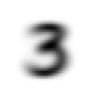

In [ ]:
# Convert tensor back to image using matplotlib
show_image(avg_3, cmap = "binary")

This is what an **average 3** digit looks like. The *average* images of digits behave as **ideal** image of what a digit should look like. Average images for all other digits are prepared below.

In [ ]:
# Storing all remaining digits
train_0 = (path/'training/0').ls()
train_1 = (path/'training/1').ls()
train_2 = (path/'training/2').ls()
train_4 = (path/'training/4').ls()
train_5 = (path/'training/5').ls()
train_6 = (path/'training/6').ls()
train_7 = (path/'training/7').ls()
train_8 = (path/'training/8').ls()
train_9 = (path/'training/9').ls()

# Converting to tensors
train_0_tensors = [tensor(Image.open(o)) for o in train_0]
train_1_tensors = [tensor(Image.open(o)) for o in train_1]
train_2_tensors = [tensor(Image.open(o)) for o in train_2]
train_4_tensors = [tensor(Image.open(o)) for o in train_4]
train_5_tensors = [tensor(Image.open(o)) for o in train_5]
train_6_tensors = [tensor(Image.open(o)) for o in train_6]
train_7_tensors = [tensor(Image.open(o)) for o in train_7]
train_8_tensors = [tensor(Image.open(o)) for o in train_8]
train_9_tensors = [tensor(Image.open(o)) for o in train_9]

# Stacking tensors together
train_0_stacked = torch.stack(train_0_tensors)
train_1_stacked = torch.stack(train_1_tensors)
train_2_stacked = torch.stack(train_2_tensors)
train_4_stacked = torch.stack(train_4_tensors)
train_5_stacked = torch.stack(train_5_tensors)
train_6_stacked = torch.stack(train_6_tensors)
train_7_stacked = torch.stack(train_7_tensors)
train_8_stacked = torch.stack(train_8_tensors)
train_9_stacked = torch.stack(train_9_tensors)

# Calculating average
avg_0 = torch.mean(train_0_stacked.float(), 0)
avg_1 = torch.mean(train_1_stacked.float(), 0)
avg_2 = torch.mean(train_2_stacked.float(), 0)
avg_4 = torch.mean(train_4_stacked.float(), 0)
avg_5 = torch.mean(train_5_stacked.float(), 0)
avg_6 = torch.mean(train_6_stacked.float(), 0)
avg_7 = torch.mean(train_7_stacked.float(), 0)
avg_8 = torch.mean(train_8_stacked.float(), 0)
avg_9 = torch.mean(train_9_stacked.float(), 0)

<Axes: >

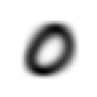

In [ ]:
show_image(avg_0, cmap='binary')

<Axes: >

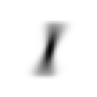

In [ ]:
show_image(avg_1, cmap='binary')

<Axes: >

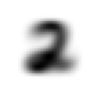

In [ ]:
show_image(avg_2, cmap='binary')

<Axes: >

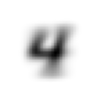

In [ ]:
show_image(avg_4, cmap='binary')

<Axes: >

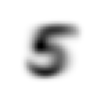

In [ ]:
show_image(avg_5, cmap='binary')

<Axes: >

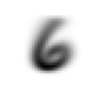

In [ ]:
show_image(avg_6, cmap='binary')

<Axes: >

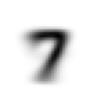

In [ ]:
show_image(avg_7, cmap='binary')

<Axes: >

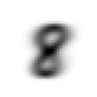

In [ ]:
show_image(avg_8, cmap='binary')

<Axes: >

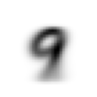

In [ ]:
show_image(avg_9, cmap='binary')

## Defining a measure of similarity
Now that *average* images for each digit can be seen, a similarity measure has to be defined that can assess which digit is most similar to the input image. In other words, a **loss function** needs to be defined where the actual digit of the input image gets assigned the *least loss*, compared to the remaining digits.
<br><br>
For predicting the digit contained in an image, each pixel holds a numerical value and is essentially behaving as an input. This means that there are 28x28 = 784 inputs per image. So, similarity can be measured by *value difference* between each pixel of the input image and the ideal image of a digit, on average. The ideal image with the least average value difference **i.e. least loss** will be the prediction. To preserve the difference as *distance*, **squared difference** should be considered (*Alternatively, absolute value can also be considered*).
<br><br>
The loss that has been used here is also called **mean squared error** (mse).

In [ ]:
# Consider handwritten image of digit 7
Image.open((path/'training/7').ls()[0])

In [ ]:
# Selected area in tensor form
input_im_7 = tensor(Image.open((path/'training/7').ls()[0]))
input_im_7[7:10,7:10]

tensor([[254, 252, 252],
        [252, 250, 250],
        [252, 189, 190]], dtype=torch.uint8)

In [ ]:
# Same selected area for average image of digit 3
avg_3[7:10,7:10]

tensor([[ 61.6009,  86.1059, 108.8380],
        [ 49.6154,  63.9397,  75.1961],
        [ 30.4851,  36.1417,  39.7407]])

In [ ]:
# Example: squared value difference between average image of 3 and this digit 7
diff_sq = pow(input_im_7[7:10,7:10].float() - avg_3[7:10,7:10].float(),2).float()
diff_sq

tensor([[37017.4219, 27520.8633, 20495.3457],
        [40959.5273, 34618.4531, 30556.4219],
        [49068.8594, 23365.6484, 22577.8691]])

In [ ]:
# distance averaged over the selected area [7:10,7:10]
diff_sq.mean((-1,-2))

tensor(31797.8223)

## Defining a prediction function
Using the above illustration, a prediction can be made by calculating the average distance of an input image with average images of all 10 handwritten digits. Prediction is therefore the average image with the least *loss*.

In [ ]:
# pass the input image as a path
def predict(image):
    image_tensor = tensor(Image.open(image))

    # Calculation for average squared difference
    loss_0 = (pow(image_tensor.float() - avg_0.float(),2)).mean((-1,-2))
    loss_1 = (pow(image_tensor.float() - avg_1.float(),2)).mean((-1,-2))
    loss_2 = (pow(image_tensor.float() - avg_2.float(),2)).mean((-1,-2))
    loss_3 = (pow(image_tensor.float() - avg_3.float(),2)).mean((-1,-2))
    loss_4 = (pow(image_tensor.float() - avg_4.float(),2)).mean((-1,-2))
    loss_5 = (pow(image_tensor.float() - avg_5.float(),2)).mean((-1,-2))
    loss_6 = (pow(image_tensor.float() - avg_6.float(),2)).mean((-1,-2))
    loss_7 = (pow(image_tensor.float() - avg_7.float(),2)).mean((-1,-2))
    loss_8 = (pow(image_tensor.float() - avg_8.float(),2)).mean((-1,-2))
    loss_9 = (pow(image_tensor.float() - avg_9.float(),2)).mean((-1,-2))

    # Storing deviations as losses
    losses = [loss_0, loss_1, loss_2, loss_3, loss_4, loss_5, loss_6, loss_7, loss_8, loss_9]

    # Returning digit with the least loss
    return losses.index(min(losses))

In [ ]:
# test image
Image.open((path/'training/6').ls()[44])

In [ ]:
# Checking prediction on the image
predict((path/'training/6').ls()[44])

6

## So how good is the performance?
Predicting digit using *average images* seems to work. But this shoud be tested for the validation set to get a read of the accuracy for this approach. This section explains how the performance for this approach is measured. The accuracy is measured for each digit and then averaged over all the 10 digits.

In [ ]:
# validation set
(path/'testing').ls()

(#10) [Path('C:/Users/singh/.fastai/data/mnist_png/testing/0'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/1'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/2'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/3'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/4'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/5'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/6'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/7'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/8'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/9')]

In [ ]:
# testing directory - digit 0
(path/'testing'/'0').ls()

(#980) [Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/10.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1001.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1009.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/101.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1034.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1047.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1061.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1084.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1094.png'),Path('C:/Users/singh/.fastai/data/mnist_png/testing/0/1121.png')...]

In [ ]:
# Defining accuracy function
def calc_acc(digit):
    digit = str(digit)
    digit_path = (path/'testing'/digit).ls()
    predictions = [predict(i) for i in digit_path]

    # number of correct predictions
    correct_pred = [j==float(digit) for j in predictions]

    # accuracy
    return sum(correct_pred)/len(predictions)

In [ ]:
# Accuracy for digit 0 in the testing set
accuracy_0 = calc_acc(0)
accuracy_0

0.8959183673469387

In [ ]:
# Calculating accuracy for remaining digits
accuracy_1 = calc_acc(1)
accuracy_2 = calc_acc(2)
accuracy_3 = calc_acc(3)
accuracy_4 = calc_acc(4)
accuracy_5 = calc_acc(5)
accuracy_6 = calc_acc(6)
accuracy_7 = calc_acc(7)
accuracy_8 = calc_acc(8)
accuracy_9 = calc_acc(9)

In [ ]:
# Average accuracy
(accuracy_0+accuracy_1+accuracy_2+accuracy_3+accuracy_4+accuracy_5+accuracy_6+accuracy_7+accuracy_8+accuracy_9)/10

0.8172567959938041

## Conclusion
Without using any artificial neural networks, a simple digit classifier using handwritten images is created in this notebook. This was achieved through image processing techniques using PyTorch tensors. It is seen that the *accuracy for this approach* is around **81%**, which is a very decent performance considering that no machine learning methods were used. The drawback with this approach is that *it's not learning from its mistakes*. This is exactly why using artificial neural networks with *stochastic gradient descent* can improve accuracy further.